In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler
%matplotlib inline

In [4]:
df = pd.read_csv('dataset.csv')

In [5]:
kategori = ['OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend', 'Revenue']
numerikal = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration',
             'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues','SpecialDay']
date = ['Month']

# Pre-Processing

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12946 entries, 0 to 12945
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12835 non-null  float64
 1   Administrative_Duration  12313 non-null  float64
 2   Informational            12946 non-null  int64  
 3   Informational_Duration   12946 non-null  float64
 4   ProductRelated           12946 non-null  int64  
 5   ProductRelated_Duration  12307 non-null  float64
 6   BounceRates              12872 non-null  float64
 7   ExitRates                12946 non-null  float64
 8   PageValues               12946 non-null  float64
 9   SpecialDay               12946 non-null  float64
 10  Month                    12946 non-null  object 
 11  OperatingSystems         12422 non-null  float64
 12  Browser                  12946 non-null  int64  
 13  Region                   12946 non-null  int64  
 14  TrafficType           

## Handling Missing Value

In [12]:
df.isna().sum()

Administrative             111
Administrative_Duration    633
Informational                0
Informational_Duration       0
ProductRelated               0
ProductRelated_Duration    639
BounceRates                 74
ExitRates                    0
PageValues                   0
SpecialDay                   0
Month                        0
OperatingSystems           524
Browser                      0
Region                       0
TrafficType                  0
VisitorType                  0
Weekend                      0
Revenue                      0
dtype: int64

* Pada data numerik, terdapat Null yang cukup banyak sehingga ditangani dengan fill menggunakan median.  
* Median dipilih karena distribusi data yang skew ke kanan.  
* Nilai yang tinggi di ujung kanan distribusi akan menarik nilai mean ke arah yang lebih tinggi daripada nilai Median.

In [13]:
#handling missing value with median
df['Administrative'] = df['Administrative'].fillna(value=df['Administrative'].median())
df['Administrative_Duration'] = df['Administrative_Duration'].fillna(value=df['Administrative_Duration'].median())
df['ProductRelated_Duration'] = df['ProductRelated_Duration'].fillna(value=df['ProductRelated_Duration'].median())
df['BounceRates'] = df['BounceRates'].fillna(value=df['BounceRates'].median())

Pada data kategorikal <code>'OperatingSystem'</code> , tidak terdapat banyak nilai Null sehingga dilakukan drop.

In [14]:
df = df.dropna(subset=['OperatingSystems'])

In [15]:
df.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

## Handle Duplicated Data

In [16]:
df.duplicated().sum()

694

In [17]:
df = df.drop_duplicates(keep='first')

In [18]:
df.duplicated().sum()

0

## Handle Categorical

### Grouping

In [19]:
df.Region = df.Region.astype('string').replace(['1', '2', '3', '4', '5', '6', '7', '8', '9'],
                      ['Jakarta', 'Bandung', 'Surabaya', 'Medan', 'Batam', 'Makassar', 'Tangerang', 'Yogyakarta', 'Semarang'])

df.Browser = df.Browser.astype('string').replace(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13'],
                                ['Safari', 'Google Chrome', 'Internet Explorer', 'Mozilla Firefox', 'Microsoft Edge', 'Samsung Internet', 'Maxthon Browser', 'Brave', 'Vivaldi', 'UC Browser', 'DuckDuckGo', 'Opera', 'Netscape Navigator'])

df.OperatingSystems = df.OperatingSystems.astype('string').replace(['1.0', '2.0', '3.0', '4.0', '5.0', '6.0', '7.0', '8.0'],
                                                  ['iOS', 'Windows', 'Android', 'MAC OS', 'Blackberry', 'Chrome Os', 'Unix', 'Linux'])

df.TrafficType = df.TrafficType.astype('string').replace(['1', '2', '3', '4', '5', '6', '8', '10', '13'],
                                        ['Organic Search', 'Paid Search', 'Direct Traffic', 'Social Media', 'Facebook Ads', 'Referral Traffic', 'Email Marketing ', 'Display Advertising', 'Affiliate Marketing'])

Data yang memiliki count yang sangat kecil akan di drop atau satukan menjadi <code>"Other"</code> value yaitu :  
  
- VisitorType :  
<code>Other</code>
- Operating system :  
<code> 4 (Mac OS), 5 (Blackberry OS), 6 (Chrome OS), 7 (Unix), 8</code>
- Browser :  
<code>7 (Maxthon), 9 (Vivaldi), 11 (DuckDuckGo), 12 (Opera), 13 (Netscape)</code>
- TrafficType :  
<code>9,7,12,14,15,16,17,18,19</code>  


In [20]:
# menghapus semua baris dari DataFrame df di mana nilai kolom 'VisitorType' adalah 'Other'.
df = df.drop(df.loc[df['VisitorType'] =='Other'].index)

In [22]:
os_replace = ['MAC OS', 'Blackberry', 'Chrome Os', 'Unix', 'Linux']
browser_replace =  ['Maxthon Browser', 'Vivaldi', 'DuckDuckGo', 'Opera', 'Netscape Navigator']
traffic_replace = ['9','7','12','14','15','16','17','18','19']

In [35]:
df['OperatingSystems'] = df['OperatingSystems'].astype(str).replace(to_replace=os_replace,value='other')
df['Browser'] = df['Browser'].astype(str).replace(to_replace=browser_replace,value='other')
df['TrafficType'] = df['TrafficType'].astype(str).replace(to_replace=traffic_replace,value='other')

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11649 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           11649 non-null  float64
 1   Administrative_Duration  11649 non-null  float64
 2   Informational            11649 non-null  int64  
 3   Informational_Duration   11649 non-null  float64
 4   ProductRelated           11649 non-null  int64  
 5   ProductRelated_Duration  11649 non-null  float64
 6   BounceRates              11649 non-null  float64
 7   ExitRates                11649 non-null  float64
 8   PageValues               11649 non-null  float64
 9   SpecialDay               11649 non-null  float64
 10  Month                    11649 non-null  object 
 11  OperatingSystems         11649 non-null  object 
 12  Browser                  11649 non-null  object 
 13  Region                   11649 non-null  object 
 14  TrafficType              11

In [42]:
# Data Type Transformation
#df['Weekend'] = df['Weekend'].astype(int)
#df['Revenue'] = df['Revenue'].astype(int)

TypeError: NDFrame.astype() missing 1 required positional argument: 'dtype'

KeyError: 'VisitorType'

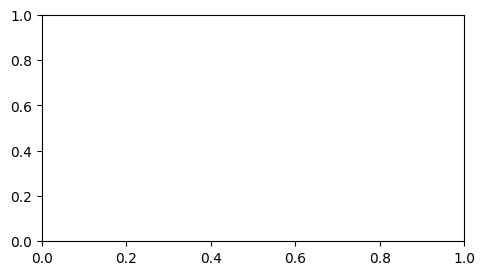

In [51]:
cat2 = ['VisitorType','OperatingSystems', 'Browser', 'Region', 'TrafficType','Month']
palette = sns.color_palette("hsv", 10)
plt.figure(figsize=(12, 10))
for i in range(0,len(cat2)):
    plt.subplot(3,2,i+1)
    sns.countplot(y=df[cat2[i]],order = df[cat2[i]].value_counts().index,palette=palette)

## Categorical Features Encoding

In [47]:
columns_to_encode = ['OperatingSystems', 'Browser', 'Region', 'TrafficType','Month']

In [48]:
from sklearn.preprocessing import OneHotEncoder

df = pd.get_dummies(df, columns =columns_to_encode)
df.head().T

,0,1,2,3,4
OperatingSystems_Android,False,False,False,True,True
OperatingSystems_Windows,False,True,False,False,False
OperatingSystems_iOS,True,False,False,False,False
OperatingSystems_other,False,False,True,False,False
Browser_Brave,False,False,False,False,False
Browser_Google Chrome,False,True,False,True,False
Browser_Internet Explorer,False,False,False,False,True
Browser_Microsoft Edge,False,False,False,False,False
Browser_Mozilla Firefox,False,False,False,False,False
Browser_Safari,True,False,True,False,False


In [50]:
df.head().T

,0,1,2,3,4
OperatingSystems_Android,False,False,False,True,True
OperatingSystems_Windows,False,True,False,False,False
OperatingSystems_iOS,True,False,False,False,False
OperatingSystems_other,False,False,True,False,False
Browser_Brave,False,False,False,False,False
Browser_Google Chrome,False,True,False,True,False
Browser_Internet Explorer,False,False,False,False,True
Browser_Microsoft Edge,False,False,False,False,False
Browser_Mozilla Firefox,False,False,False,False,False
Browser_Safari,True,False,True,False,False
